# Credit Card Fraud Challenge

### Karim Amjar, Cédric Bailly, Thomas Jalabert, Thomas Mahiout, Vincent Raybaud, Tiffanie Schreyeck

Source : https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow

#### Exploring the Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [7]:
df = pd.read_csv("creditcard.csv") # On charge le fichier en mémoire
df.head() # affiche les 5 premières lignes

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Chaque instance représente une transaction qui est consituée de 31 attributs. 
- Il y a un attribut $Time$ qui représente le moment dans la journée où la transaction a été effectuée.
- Un attribut $Amount$ qui représente le montant de la transaction.
- Un attribut $Class$ qui permet de savoir si la transaction est frauduleuse ou non.
    - 
- 28 autres attributs classé de $V1$ à $V28$

Les attributs $Vx$ ne sont pas explicitement défini par la base de donnée mais sont des éléments constitutifs de la transaction. L'information est surement caché à des fin de protections des données bancaires. De plus, un traitement supplémentaire a peut-être été effecuté ces données pour que l'on ne connaisse pas leurs vraie fonction.

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Il n'y a aucune donnée manquante dans ce dataset

In [9]:
print ("Fraud:\n")

print (df.Time[df.Class == 1].describe())
print ()
print ("Normal:")
print (df.Time[df.Class == 0].describe())

Fraud:

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal:
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


Ici, on cherche à comparer les deux classes de données. Il y a peut-être une différence sur la répartition dans le temps entre une fraude et une transaction normale.
Il n'y a pas de moyen de distinger les deux classes par ce biais.
On remarque qu'il y a seulement 492 fraudes pour 284315 + 492 transactions dans cet ensemble de données.

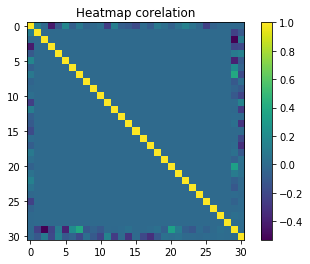

In [23]:
df_corr = df.corr()
plt.title('Heatmap corelation')
plt.imshow(df_corr, interpolation='nearest')
plt.colorbar()
plt.show()